<a href="https://colab.research.google.com/github/sneh288/Study-of-Air-Pollution-and-Prediction/blob/master/Study_and_Prediction_of_AirPolution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()       # checking for GPU

'/device:GPU:0'

In [ ]:
! pip install -q keras          

In [ ]:
import pandas as pd
import numpy as np

# Reading CSV File

In [ ]:
data= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Air quality/dataset.csv", header=0, encoding = 'unicode_escape')

In [ ]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [ ]:
df=data[["so2","no2","spm","rspm",'date','state','type','pm2_5']]

In [ ]:
df.head()

,so2,no2,spm,rspm,date,state,type,pm2_5
0,4.8,17.4,NaN,NaN,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN
1,3.1,7.0,NaN,NaN,01-02-1990,Andhra Pradesh,Industrial Area,NaN
2,6.2,28.5,NaN,NaN,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN
3,6.3,14.7,NaN,NaN,01-03-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN
4,4.7,7.5,NaN,NaN,01-03-1990,Andhra Pradesh,Industrial Area,NaN


# Data Wrangling

***## Filtering so2***

In [ ]:
df['so2'].dropna().sample(df['so2'].isnull().sum(),random_state=0)


390378    17.434
71690      4.000
404900     7.000
322078     7.800
317567     5.000
           ...  
301897    18.000
153684     6.000
280011    14.350
87459     27.700
76287      8.000
Name: so2, Length: 34646, dtype: float64

In [ ]:
df[df['so2'].isnull()].index # finding the index in so2 column that contains null values


Int64Index([   106,    112,    389,    405,    413,    426,    433,    442,
               449,    456,
            ...
            433510, 433511, 433581, 433582, 433686, 433699, 434831, 435739,
            435740, 435741],
           dtype='int64', length=34646)

In [ ]:
# Function to impute null values of so2
def impute_nan_so2(df,variable,mean_so2):
    df[variable+"_mean"]=df[variable].fillna(mean_so2)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
mean_so2=df.so2.mean()
mean_so2


10.829414322671498

In [ ]:
impute_nan_so2(df,"so2",mean_so2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

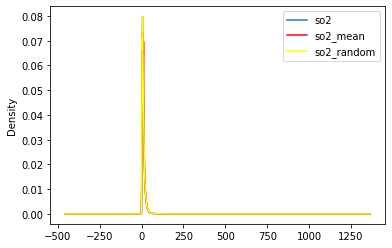

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['so2'].plot(kind='kde', ax=ax)
df.so2_mean.plot(kind='kde', ax=ax, color='red')
df.so2_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
# finding standard deviation of so2, so2_mean, so2_random
print(df['so2'].std())
print(df['so2_mean'].std())
print(df['so2_random'].std())


11.177186856258917
10.723632508055749
11.150879343758033


# *Since the standard deviation of so2_random and so2 is almost same hence so2_random will be used as feature*

# **Filtering No2**

In [ ]:
df['no2'].dropna().sample(df['no2'].isnull().sum(),random_state=0)


124242     31.0
208800     60.9
328439     43.0
231614      9.0
242524     54.0
          ...  
188837     22.5
107206     12.0
413800    193.3
119546     16.0
297857     26.7
Name: no2, Length: 16233, dtype: float64

In [ ]:
df[df['no2'].isnull()].index
# finding index that contains null values

Int64Index([   106,    112,    389,    405,    413,    426,    433,    442,
               449,    456,
            ...
            433510, 433511, 433581, 433582, 433686, 433699, 434831, 435739,
            435740, 435741],
           dtype='int64', length=16233)

In [ ]:
def impute_nan_no2(df,variable,mean_no2):
    df[variable+"_mean"]=df[variable].fillna(mean_no2)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
mean_no2=df.no2.mean()
mean_no2

25.80962289781295

In [ ]:
impute_nan_no2(df,"no2",mean_no2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

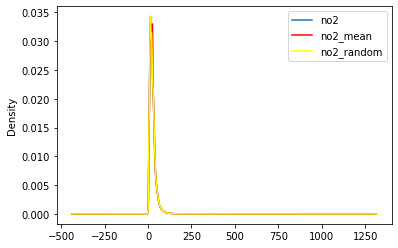

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['no2'].plot(kind='kde', ax=ax)
df.no2_mean.plot(kind='kde', ax=ax, color='red')
df.no2_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
# finding standard deviation of no2, no2_mean, no2_random
print(df['no2'].std())
print(df['no2_mean'].std())
print(df['no2_random'].std())



18.503086398780695
18.1551602843422
18.49387699237772


**###filtering RSPM**

In [ ]:
df['rspm'].dropna().sample(df['rspm'].isnull().sum(),random_state=0)


194000    324.000000
366783     71.000000
426200    231.333333
313160    169.000000
127762     89.000000
             ...    
349863     88.000000
42724      73.000000
9378      129.000000
289333     23.000000
69911     230.000000
Name: rspm, Length: 40222, dtype: float64

In [ ]:
df[df['rspm'].isnull()].index


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            419124, 419125, 419126, 419464, 419562, 433149, 433551, 435739,
            435740, 435741],
           dtype='int64', length=40222)

In [ ]:
mean_rspm=df.rspm.mean()
mean_rspm

108.83278418538401

In [ ]:
def impute_nan_rspm(df,variable,mean_rspm):
    df[variable+"_mean"]=df[variable].fillna(mean_rspm)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [ ]:
impute_nan_rspm(df,"rspm",mean_rspm)


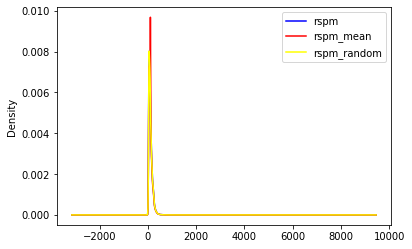

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['rspm'].plot(kind='kde', ax=ax,color='blue')
df.rspm_mean.plot(kind='kde', ax=ax, color='red')
df.rspm_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
print(df['rspm'].std())
print(df['rspm_mean'].std())
print(df['rspm_random'].std())


74.872429951634
71.33314809211298
75.36913194907281


**##Filtering SPM**

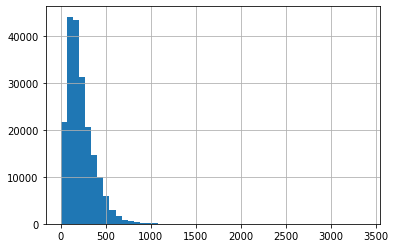

In [ ]:
df.spm.hist(bins=50)


In [ ]:

extreme=df.spm.mean()+3*df.spm.std()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


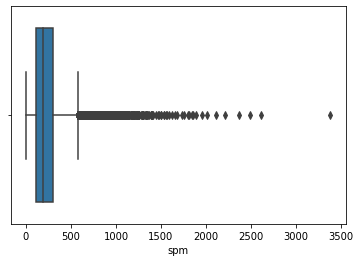

In [ ]:
import seaborn as sns
sns.boxplot('spm',data=df)


In [ ]:

def impute_nan_spm(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)


In [ ]:

impute_nan_spm(df,'spm',df.spm.median(),extreme)


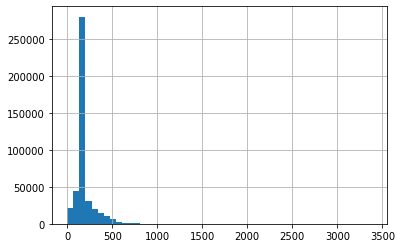

In [ ]:
df['spm'].hist(bins=50)


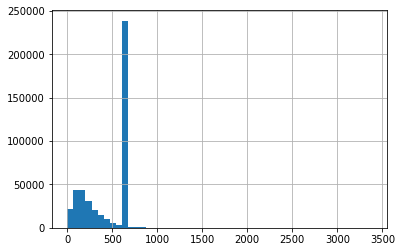

In [ ]:
df['spm_end_distribution'].hist(bins=50)


In [ ]:
print(df['spm'].std())
print(df['spm_end_distribution'].std())


103.52168423288346
248.17600342016547


In [ ]:
df.head()

,so2,no2,spm,rspm,date,state,type,pm2_5,so2_mean,so2_random,no2_mean,no2_random,rspm_mean,rspm_random,spm_end_distribution
0,4.8,17.4,187.0,NaN,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN,4.8,4.8,17.4,17.4,108.832784,324.000000,674.96985
1,3.1,7.0,187.0,NaN,01-02-1990,Andhra Pradesh,Industrial Area,NaN,3.1,3.1,7.0,7.0,108.832784,71.000000,674.96985
2,6.2,28.5,187.0,NaN,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN,6.2,6.2,28.5,28.5,108.832784,231.333333,674.96985
3,6.3,14.7,187.0,NaN,01-03-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN,6.3,6.3,14.7,14.7,108.832784,169.000000,674.96985
4,4.7,7.5,187.0,NaN,01-03-1990,Andhra Pradesh,Industrial Area,NaN,4.7,4.7,7.5,7.5,108.832784,89.000000,674.96985


In [ ]:
df.isnull().sum()

so2                      34646
no2                      16233
spm                          0
rspm                     40222
date                         7
state                        0
type                      5393
pm2_5                   426428
so2_mean                     0
so2_random                   0
no2_mean                     0
no2_random                   0
rspm_mean                    0
rspm_random                  0
spm_end_distribution         0
dtype: int64

In [ ]:
Dff= df

In [ ]:
Dff.head()

,so2,no2,spm,rspm,date,state,type,pm2_5,so2_mean,so2_random,no2_mean,no2_random,rspm_mean,rspm_random,spm_end_distribution
0,4.8,17.4,187.0,NaN,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN,4.8,4.8,17.4,17.4,108.832784,324.000000,674.96985
1,3.1,7.0,187.0,NaN,01-02-1990,Andhra Pradesh,Industrial Area,NaN,3.1,3.1,7.0,7.0,108.832784,71.000000,674.96985
2,6.2,28.5,187.0,NaN,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN,6.2,6.2,28.5,28.5,108.832784,231.333333,674.96985
3,6.3,14.7,187.0,NaN,01-03-1990,Andhra Pradesh,"Residential, Rural and other Areas",NaN,6.3,6.3,14.7,14.7,108.832784,169.000000,674.96985
4,4.7,7.5,187.0,NaN,01-03-1990,Andhra Pradesh,Industrial Area,NaN,4.7,4.7,7.5,7.5,108.832784,89.000000,674.96985


In [ ]:
Dff.drop('pm2_5',axis=1,inplace=True)

In [ ]:
df.drop('so2',axis=1,inplace=True)

In [ ]:
df.drop('no2',axis=1,inplace=True)

In [ ]:
df.drop('rspm',axis=1,inplace=True)

In [ ]:
df.drop('so2_mean',axis=1,inplace=True)

In [ ]:
df.drop('rspm_mean',axis=1,inplace=True)

In [ ]:
df.drop('no2_mean',axis=1,inplace=True)

In [ ]:
df.drop('spm_end_distribution',axis=1,inplace=True)

In [ ]:
df.rename(columns={"so2_random": "so2", "no2_random": "no2","rspm_random": "rspm"},inplace=True)


In [ ]:
df.head()

,spm,date,state,type,so2,no2,rspm
0,187.0,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",4.8,17.4,324.000000
1,187.0,01-02-1990,Andhra Pradesh,Industrial Area,3.1,7.0,71.000000
2,187.0,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",6.2,28.5,231.333333
3,187.0,01-03-1990,Andhra Pradesh,"Residential, Rural and other Areas",6.3,14.7,169.000000
4,187.0,01-03-1990,Andhra Pradesh,Industrial Area,4.7,7.5,89.000000


In [ ]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(so2,no2,spm,rspm):
    aqi=0
    if(so2>no2 and so2>spm and so2>rspm):
     aqi=so2
    if(spm>so2 and spm>no2 and spm>rspm):
     aqi=spm
    if(no2>so2 and no2>spm and no2>rspm):
     aqi=no2
    if(rspm>so2 and rspm>no2 and rspm>spm):
     aqi=rspm
    return aqi
df['AQI']=df.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm'],x['rspm']),axis=1)
df1= df[['so2','no2','rspm','spm','date','AQI']]
df1.head()


,so2,no2,rspm,spm,date,AQI
0,4.8,17.4,324.000000,187.0,01-02-1990,324.000000
1,3.1,7.0,71.000000,187.0,01-02-1990,187.000000
2,6.2,28.5,231.333333,187.0,01-02-1990,231.333333
3,6.3,14.7,169.000000,187.0,01-03-1990,187.000000
4,4.7,7.5,89.000000,187.0,01-03-1990,187.000000


In [ ]:
Dff.head()

,spm,date,state,type,so2,no2,rspm,AQI
0,187.0,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",4.8,17.4,324.000000,324.000000
1,187.0,01-02-1990,Andhra Pradesh,Industrial Area,3.1,7.0,71.000000,187.000000
2,187.0,01-02-1990,Andhra Pradesh,"Residential, Rural and other Areas",6.2,28.5,231.333333,231.333333
3,187.0,01-03-1990,Andhra Pradesh,"Residential, Rural and other Areas",6.3,14.7,169.000000,187.000000
4,187.0,01-03-1990,Andhra Pradesh,Industrial Area,4.7,7.5,89.000000,187.000000


In [ ]:
df1.drop('date',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


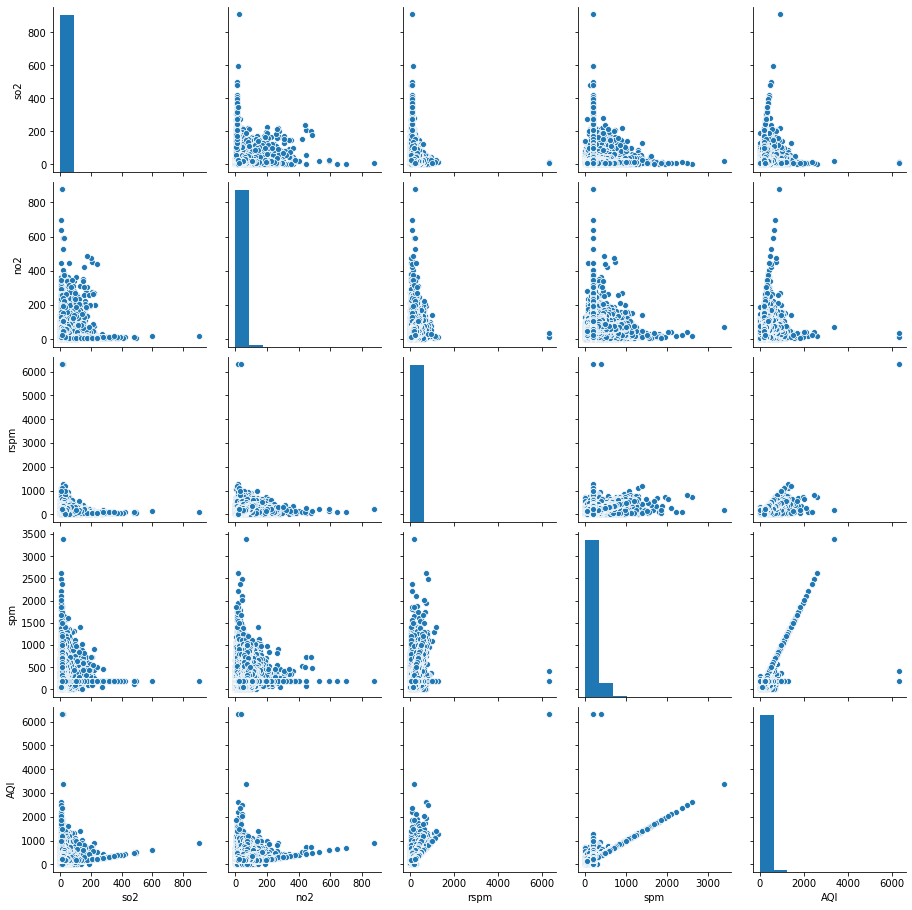

In [ ]:
sns.pairplot(df1)


In [ ]:
df1.head()

,so2,no2,rspm,spm,AQI
0,4.8,17.4,324.000000,187.0,324.000000
1,3.1,7.0,71.000000,187.0,187.000000
2,6.2,28.5,231.333333,187.0,231.333333
3,6.3,14.7,169.000000,187.0,187.000000
4,4.7,7.5,89.000000,187.0,187.000000


In [ ]:
X=df1.iloc[:,:-1] ## independent features
y=df1.iloc[:,-1] ## dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Applying Artificial neural network **

In [ ]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 30)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 204362 samples, validate on 100657 samples
Epoch 1/30
204362/204362 [==============================] - 80s 389us/step - loss: 3.0379 - mean_absolute_error: 3.0379 - val_loss: 8.4828 - val_mean_absolute_error: 8.4828
Epoch 2/30
204362/204362 [==============================] - 77s 378us/step - loss: 1.8667 - mean_absolute_error: 1.8667 - val_loss: 1.6808 - val_mean_absolute_error: 1.6808
Epoch 3/30
204362/204362 [==============================] - 77s 378us/step - loss: 1.6324 - mean_absolute_error: 1.6324 - val_loss: 0.5280 - val_mean_absolute_error: 0.5280
Epoch 4/30
204362/204362 [==============================] - 77s 376us/step - loss: 1.4664 - mean_absolute_error: 1.4664 - val_loss: 4.2182 - val_mean_absolute_error: 4.2182
Epoch 5/30
204362/204362 [==============================] - 78s 379us/step - loss: 1.3301 - mean_absolute_error: 1.3301 - val_loss: 1.0010 - val_mean_absolute_error: 1.0010
Epoch 6/30
204362/204362 [==============================] - 77s 378us/step - loss: 

In [ ]:
# Predicting the Test set results
prediction_nn=NN_model.predict(X_test)


In [ ]:
y_test


274062    158.0
23326     187.0
265968    187.0
431607    187.0
28844      59.0
          ...  
147903    187.0
114193    141.0
139960    189.0
121112    198.0
232313    187.0
Name: AQI, Length: 130723, dtype: float64

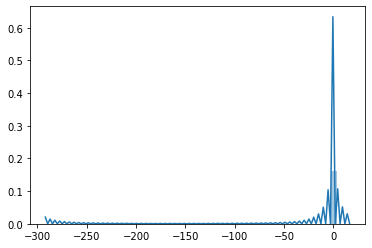

In [ ]:
sns.distplot(y_test.values.reshape(-1,1)-prediction_nn)


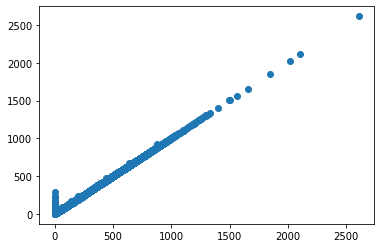

In [ ]:
plt.scatter(y_test,prediction_nn)


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_nn))
print('MSE:', metrics.mean_squared_error(y_test, prediction_nn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_nn)))

MAE: 0.6948025996401578
MSE: 40.99019636253216
RMSE: 6.402358656193213


In [ ]:
print(prediction_nn)

[[158.3829 ]
 [187.43648]
 [187.41365]
 ...
 [189.43275]
 [198.50336]
 [187.44467]]


In [ ]:
prediction_nn.shape
prediction_nn

array([[158.3829 ],
       [187.43648],
       [187.41365],
       ...,
       [189.43275],
       [198.50336],
       [187.44467]], dtype=float32)

In [ ]:
new_nn = prediction_nn

In [ ]:
new_nn = new_nn.reshape(-1)

In [ ]:
new_nn.shape

(130723,)

bold text

##**Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_


array([ 0.02453485, -0.0603468 ,  0.35822279,  0.85831785])

In [ ]:
regressor.intercept_


-1.9722682657940993

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.9429578038125785


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()


0.9392311592255631

In [ ]:
prediction_linear=regressor.predict(X_test)


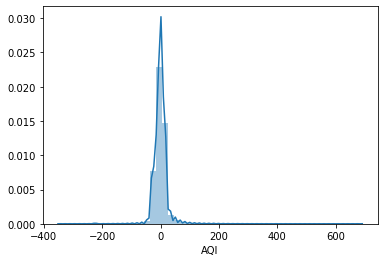

In [ ]:
sns.distplot(y_test-prediction_linear)


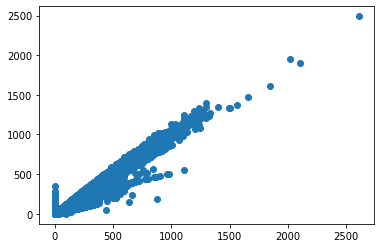

In [ ]:
plt.scatter(y_test,prediction_linear)


In [ ]:
from sklearn import metrics


In [ ]:
# Performance Metrics of Linear Regression
print('MAE:', metrics.mean_absolute_error(y_test, prediction_linear))
print('MSE:', metrics.mean_squared_error(y_test, prediction_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_linear)))


MAE: 14.106720395410521
MSE: 548.1557309332488
RMSE: 23.412725833043208


In [ ]:
#print('RAE:', metrics._absolute_error(y_test, prediction_linear))
prediction_linear.shape
prediction_linear

array([155.16006114, 190.01908617, 165.80318395, ..., 192.24579995,
       228.56933859, 213.39775907])

##**Random** **forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor()


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
regressor1=RandomForestRegressor()

regressor1.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor1.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.996867798774475


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))


Coefficient of determination R^2 <-- on train set: 0.95057876235079


In [ ]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(regressor1,X,y,cv=5)

In [ ]:
score1.mean()


0.9864669572868101

In [ ]:
prediction1=regressor1.predict(X_test)


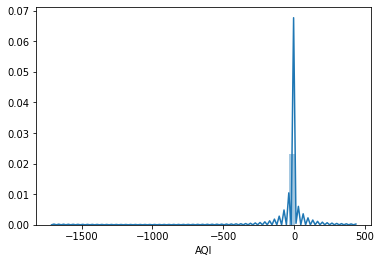

In [ ]:
sns.distplot(y_test-prediction1)


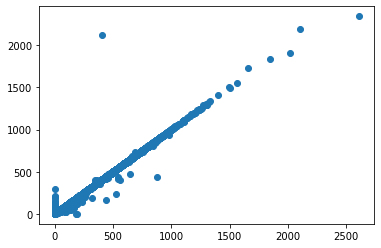

In [ ]:
plt.scatter(y_test,prediction1)


In [ ]:
RandomForestRegressor()


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 3)]
print(n_estimators)

[100, 150, 200]


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8, 11, 14, 17, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=14 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=14, total=  24.0s
[CV] n_estimators=100, min_samples_split=2, m

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  8.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_


{'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_random.best_score_


-230.0783239242713

In [ ]:
predictions1=rf_random.predict(X_test)


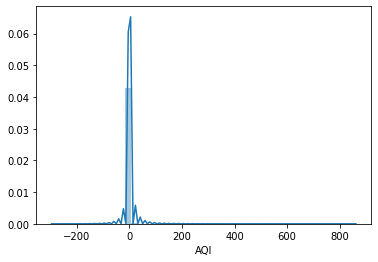

In [ ]:
sns.distplot(y_test-predictions1)


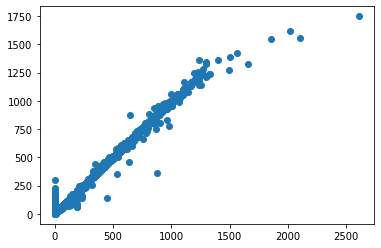

In [ ]:
plt.scatter(y_test,predictions1)


In [ ]:
# Performance Metrics of KNN
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


MAE: 0.6889087700519015
MSE: 26.356217735081998
RMSE: 5.133830707676481


In [ ]:
predictions1.shape

(130723,)

##**KNN** **Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
regressor_knn=KNeighborsRegressor(n_neighbors=1)
regressor_knn.fit(X_train,y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor_knn.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 1.0


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor_knn.score(X_test, y_test)))


Coefficient of determination R^2 <-- on test set: 0.9968351212692322


In [ ]:
from sklearn.model_selection import cross_val_score
score_knn=cross_val_score(regressor_knn,X,y,cv=5)


In [ ]:
score_knn.mean()


0.995928387490882

In [ ]:
prediction_knn=regressor_knn.predict(X_test)


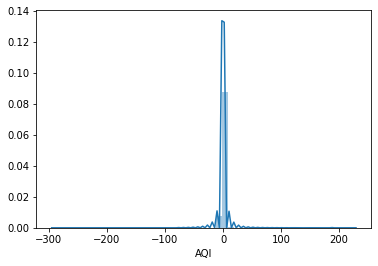

In [ ]:
sns.distplot(y_test-prediction_knn)


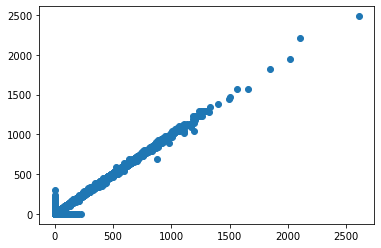

In [ ]:
plt.scatter(y_test,prediction_knn)


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_knn))
print('MSE:', metrics.mean_squared_error(y_test, prediction_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_knn)))


MAE: 0.9350055977004813
MSE: 35.10325715217791
RMSE: 5.9248001782488755


In [ ]:
import numpy as np


In [ ]:
predictions1.shape
comparision = pd.DataFrame({'Actual Value': y_test, 'Predicted_LR': prediction_linear,'Predicted_knn': prediction_knn,'Prediction_RF':predictions1,'Predicted_ANN': new_nn})  


In [ ]:
comparision.head()

,Actual Value,Predicted_LR,Predicted_knn,Prediction_RF,Predicted_ANN
274062,158.0,155.160061,155.0,158.634071,158.382904
23326,187.0,190.019086,187.0,187.080151,187.436478
265968,187.0,165.803184,187.0,186.984897,187.413651
431607,187.0,186.777889,187.0,186.865570,187.391464
28844,59.0,61.833102,59.0,58.617006,59.149422


In [ ]:
comparision.shape

(130723, 5)

In [ ]:
knn_mae =  metrics.mean_absolute_error(y_test, prediction_knn)
knn_mse = metrics.mean_squared_error(y_test, prediction_knn)
knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_knn))


In [ ]:
print(knn_mae, knn_mse, knn_rmse)

0.9350055977004813 35.10325715217791 5.9248001782488755


In [ ]:
random_mae = metrics.mean_absolute_error(y_test, predictions1)
random_mse = metrics.mean_squared_error(y_test, predictions1)
random_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions1))

In [ ]:
print(random_mae, random_mse, random_rmse)

0.6885416122777273 25.7256998250858 5.072050850009866


In [ ]:
linear_mae = metrics.mean_absolute_error(y_test, prediction_linear)
linear_mse = metrics.mean_squared_error(y_test, prediction_linear)
linear_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_linear))

print(linear_mae, linear_mse, linear_rmse)

14.106720395410521 548.1557309332488 23.412725833043208


In [ ]:
nn_mae = metrics.mean_absolute_error(y_test, prediction_nn)
nn_mse = metrics.mean_squared_error(y_test, prediction_nn)
nn_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_nn))

print(nn_mae, nn_mse, nn_rmse)

0.8727688640548487 41.22663030331268 6.420796703160184


In [ ]:
mae_output = np.array([nn_mae, linear_mae, random_mae, knn_mae])
mse_output = np.array([nn_mse, linear_mse, random_mse, knn_mse])
rmse_output = np.array([nn_rmse, linear_rmse, random_rmse, knn_rmse])
print(mae_output, mse_output, rmse_output)

[ 0.87276886 14.1067204   0.68854161  0.9350056 ] [ 41.2266303  548.15573093  25.72569983  35.10325715] [ 6.4207967  23.41272583  5.07205085  5.92480018]


In [ ]:
color_output = np.array(['red', 'yellow', 'blue', 'green'])

In [ ]:
x_axis_labels = np.array(['Neural Network', 'Linear Regression', 'Random Forest', 'KNN'])

In [ ]:
import seaborn as sns


In [ ]:
sns.catplot(x_axis_labels, mae_output, x='Models', y='MAE',kind="count", align='mid', color='green', width=0.5)

#plt.xlabel('Models')
#plt.ylabel('MAE')
#plt.show()

TypeError: ignored

# Comparision of all four models

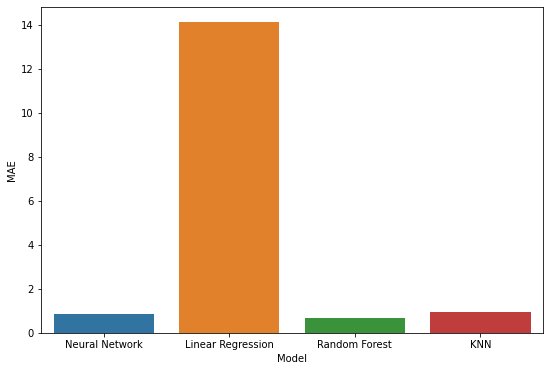

In [ ]:
f,ax=plt.subplots(figsize=(9,6))
ax = sns.barplot(x_axis_labels, mae_output)
ax.set(xlabel='Model', ylabel='MAE')
plt.show()

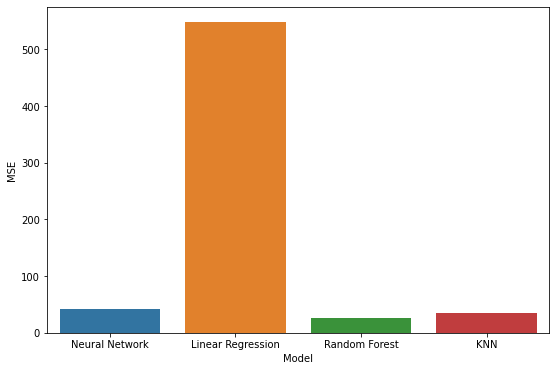

In [ ]:
f,ax=plt.subplots(figsize=(9,6))
ax = sns.barplot(x_axis_labels, mse_output)
ax.set(xlabel='Model', ylabel='MSE')
plt.show()

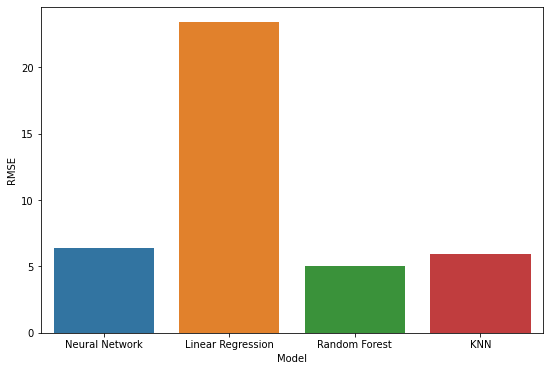

In [ ]:
f,ax=plt.subplots(figsize=(9,6))
ax = sns.barplot(x_axis_labels, rmse_output)
ax.set(xlabel='Model', ylabel='RMSE')
plt.show()

In [ ]:
date_df = Dff

In [ ]:
date_df.head()


,spm,date,so2,no2,rspm,AQI
0,187.0,01-02-1990,4.8,17.4,324.000000,324.000000
1,187.0,01-02-1990,3.1,7.0,71.000000,187.000000
2,187.0,01-02-1990,6.2,28.5,231.333333,231.333333
3,187.0,01-03-1990,6.3,14.7,169.000000,187.000000
4,187.0,01-03-1990,4.7,7.5,89.000000,187.000000


In [ ]:
date_df.drop(['spm', 'so2', 'no2', 'rspm', 'AQI'], axis=1, inplace=True)

In [ ]:
date_df.head()

,date
0,01-02-1990
1,01-02-1990
2,01-02-1990
3,01-03-1990
4,01-03-1990


In [ ]:
comparision_concat = pd.concat([date_df, comparision], join='inner', axis=1)

In [ ]:
comparision_concat.shape

(130723, 6)

In [ ]:
comparision_concat.isnull().sum()

In [ ]:
comp_new = comparision_concat

In [ ]:
import datetime as dt

In [ ]:
comp_new['date'] = pd.to_datetime(comp_new['date'],format='%d-%m-%Y') # date parse
comp_new['year'] = comp_new['date'].dt.year # year
comp_new['year'] = comp_new['year'].fillna(0.0).astype(int)
comp_new = comp_new[(comp_new['year']>0)]
comp_df = comp_new[['Actual Value','Predicted_LR','Predicted_knn', 'Prediction_RF', 'Predicted_ANN', 'year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


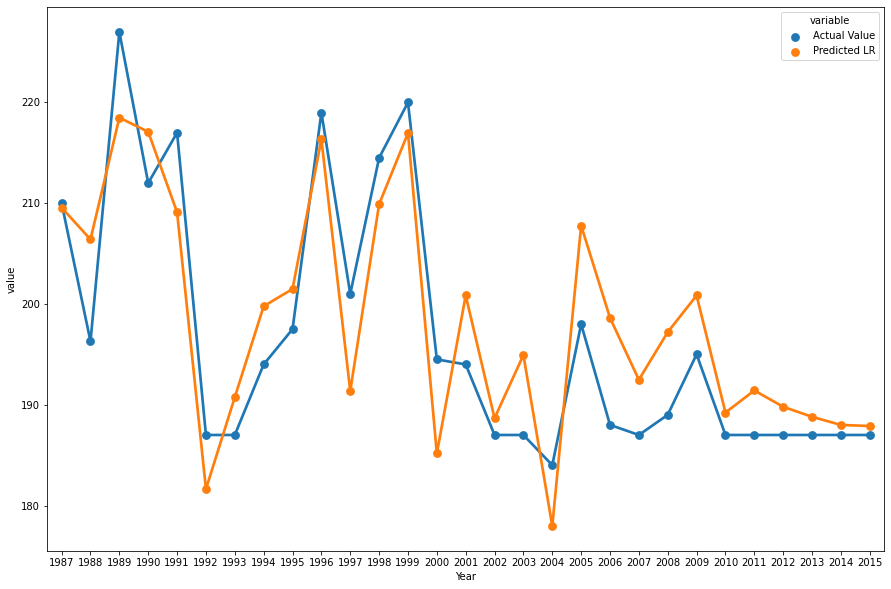

In [ ]:
comp_lr_df = pd.DataFrame({
    'Year': comp_df['year'],
    'Actual Value': comp_df['Actual Value'],
    'Predicted LR': comp_df['Predicted_LR']
})
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='Year', y='value', hue='variable', data=pd.melt(comp_lr_df, ['Year']))

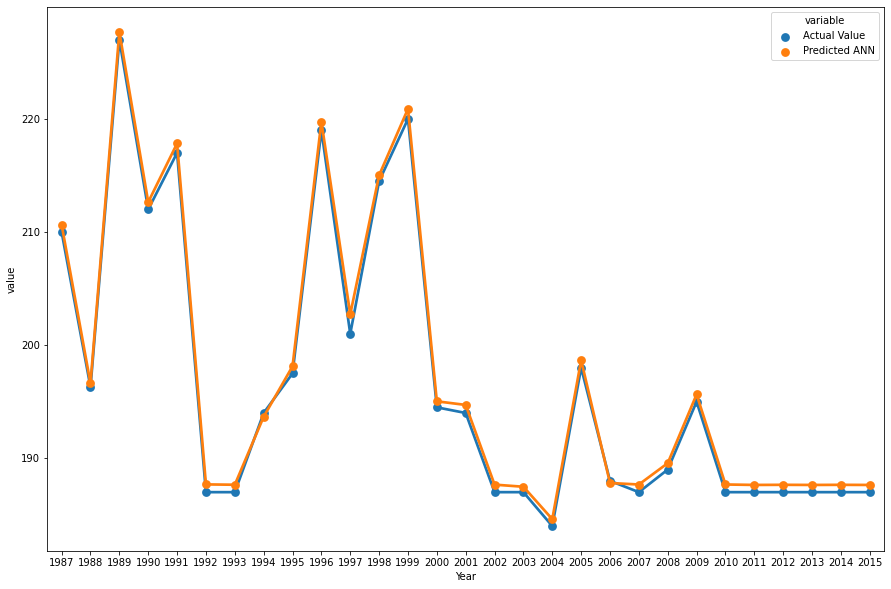

In [ ]:
comp_ann_df = pd.DataFrame({
    'Year': comp_df['year'],
    'Actual Value': comp_df['Actual Value'],
    'Predicted ANN': comp_df['Predicted_ANN']
})
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='Year', y='value', hue='variable', data=pd.melt(comp_ann_df, ['Year']))


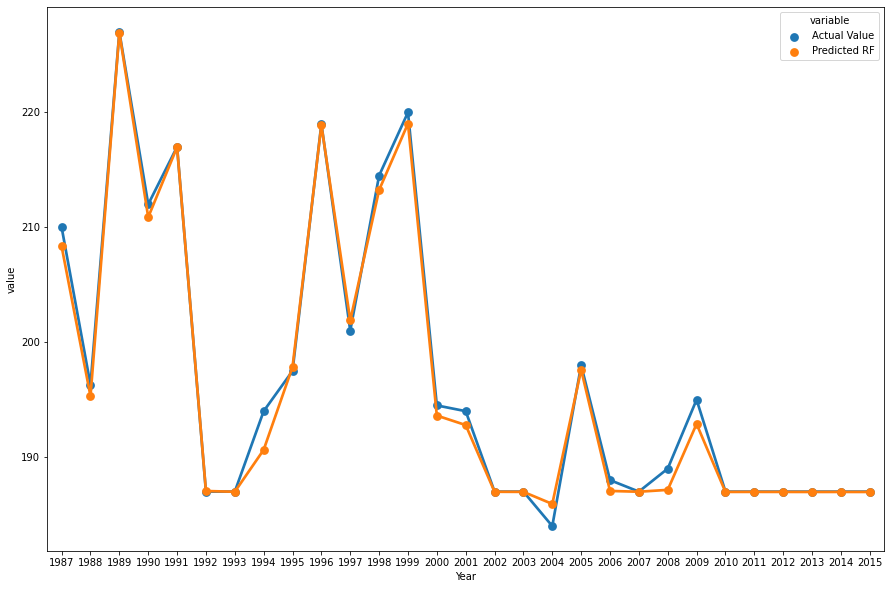

In [ ]:
comp_rf_df = pd.DataFrame({
    'Year': comp_df['year'],
    'Actual Value': comp_df['Actual Value'],
    'Predicted RF': comp_df['Prediction_RF']
})
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='Year', y='value', hue='variable', data=pd.melt(comp_rf_df, ['Year']))

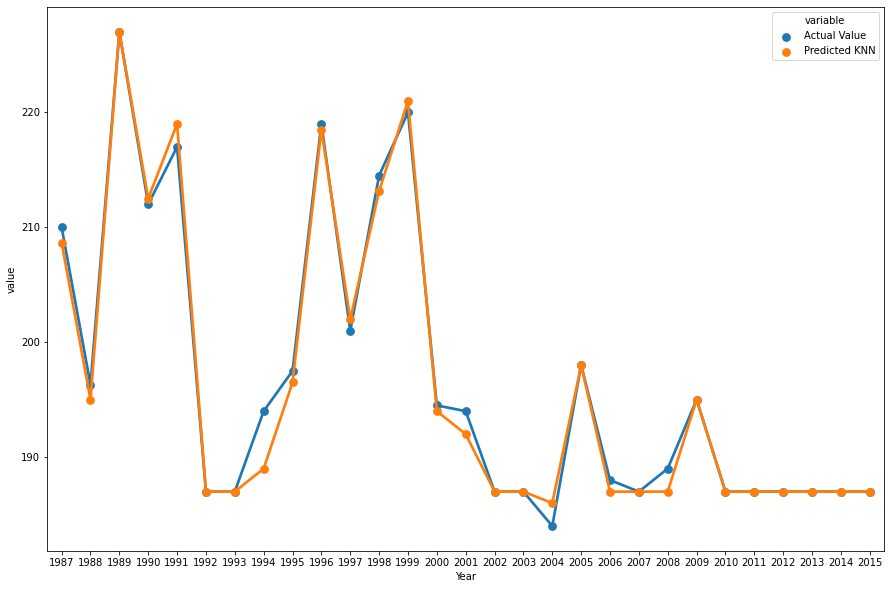

In [ ]:
comp_knn_df = pd.DataFrame({
    'Year': comp_df['year'],
    'Actual Value': comp_df['Actual Value'],
    'Predicted KNN': comp_df['Predicted_knn']
})
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='Year', y='value', hue='variable', data=pd.melt(comp_knn_df, ['Year']))

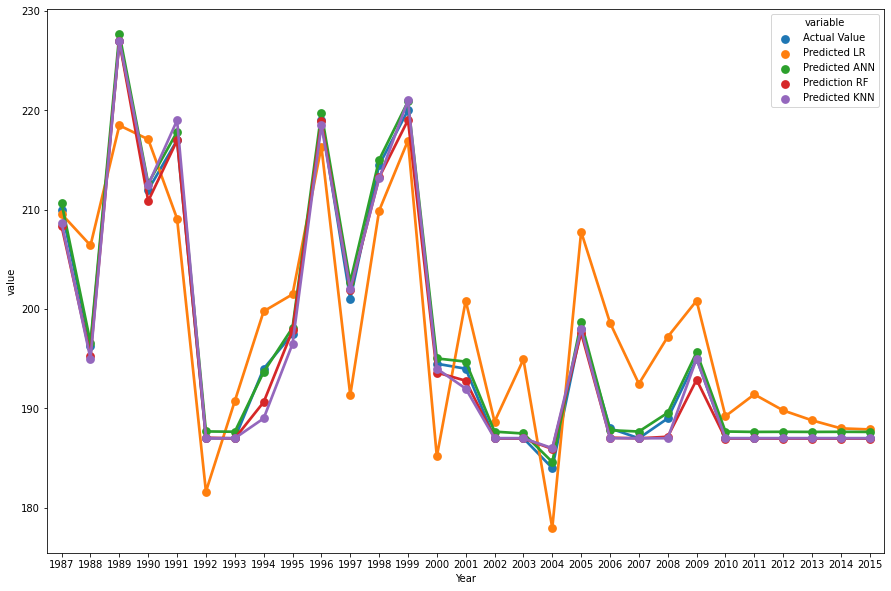

In [ ]:
comp_all_model_df = pd.DataFrame({
    'Year': comp_df['year'],
    'Actual Value': comp_df['Actual Value'],
    'Predicted LR': comp_df['Predicted_LR'],
    'Predicted ANN': comp_df['Predicted_ANN'],
    'Prediction RF': comp_df['Prediction_RF'],
    'Predicted KNN': comp_df['Predicted_knn'],
})
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='Year', y='value', hue='variable', data=pd.melt(comp_all_model_df, ['Year']))

In [ ]:
comp_new2 = comparision_concat
comp_new2['date'] = pd.to_datetime(comp_new2['date'],format='%d-%m-%Y') # date parse
comp_new2['year'] = comp_new2['date'].dt.year # year
comp_new2['month'] = comp_new2['date'].dt.month # month

In [ ]:
comp_new2['year'] = comp_new2['year'].fillna(0.0).astype(int)
comp_new2 = comp_new2[(comp_new2['year']>0)]

In [ ]:
comp_new2['month'] = comp_new2['month'].fillna(0.0).astype(int)
comp_new2 = comp_new2[(comp_new2['month']>0)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
comp_new2.head()

,date,Actual Value,Predicted_LR,Predicted_knn,Prediction_RF,Predicted_ANN,year,month
5,1990-03-01,187.0,191.528668,187.0,186.925327,187.563660,1990,3
12,1990-06-01,82.0,96.969358,84.0,84.308866,82.264496,1990,6
14,1990-07-01,118.0,135.807028,119.0,118.962562,118.288559,1990,7
29,1991-01-01,197.0,198.984239,196.0,196.148414,197.669006,1991,1
32,1991-02-01,125.0,125.797666,126.0,125.278440,125.337845,1991,2


In [ ]:
comp_year_2015 = comp_new2

In [ ]:
comp_year_2015 = comp_year_2015.loc[comp_year_2015['year'] == 2015]

In [ ]:
comp_year_2015.head()

,month,Actual Value,Predicted_LR,Predicted_knn,Prediction_RF,Predicted_ANN,year
0,1,187.0,190.167927,187.0,186.967777,187.635223,2015
1,2,187.0,190.870325,187.0,186.968084,187.627167,2015
2,3,187.0,190.284711,187.0,186.965561,187.620056,2015
3,4,187.0,189.149696,187.0,186.969440,187.634781,2015
4,5,187.0,189.369468,187.0,186.969622,187.637421,2015


In [ ]:
comp_year_2015 = comp_year_2015[['Actual Value','Predicted_LR','Predicted_knn', 'Prediction_RF', 'Predicted_ANN', 'year', 'month']].groupby(["month"]).median().reset_index().sort_values(by='year',ascending=False)

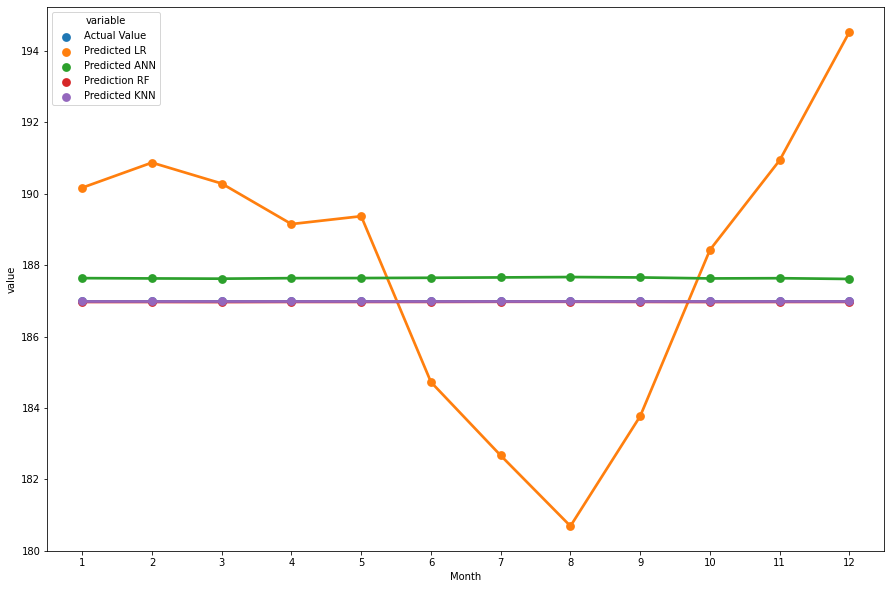

In [ ]:
comp_all_model_2015_df = pd.DataFrame({
    'Month': comp_year_2015['month'],
    'Actual Value': comp_year_2015['Actual Value'],
    'Predicted LR': comp_year_2015['Predicted_LR'],
    'Predicted ANN': comp_year_2015['Predicted_ANN'],
    'Prediction RF': comp_year_2015['Prediction_RF'],
    'Predicted KNN': comp_year_2015['Predicted_knn'],
})
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='Month', y='value', hue='variable', data=pd.melt(comp_all_model_2015_df, ['Month']))

# Prediction For the year 2015

In [ ]:
comp_all_model_2015_df.head(12)

,Month,Actual Value,Predicted LR,Predicted ANN,Prediction RF,Predicted KNN
0,1,187.0,190.167927,187.635223,186.967777,187.0
1,2,187.0,190.870325,187.627167,186.968084,187.0
2,3,187.0,190.284711,187.620056,186.965561,187.0
3,4,187.0,189.149696,187.634781,186.969440,187.0
4,5,187.0,189.369468,187.637421,186.969622,187.0
5,6,187.0,184.724787,187.645416,186.970292,187.0
6,7,187.0,182.668942,187.655151,186.973313,187.0
7,8,187.0,180.691642,187.666229,186.973206,187.0
8,9,187.0,183.769874,187.654617,186.970623,187.0
9,10,187.0,188.426673,187.626984,186.967457,187.0


In [ ]:
comp_year_2000 = comp_new2

In [ ]:
comp_year_2000 = comp_year_2000[['Actual Value','Predicted_LR','Predicted_knn', 'Prediction_RF', 'Predicted_ANN', 'year', 'month']].groupby(["month"]).median().reset_index().sort_values(by='year',ascending=False)

In [ ]:
comp_year_2000 = comp_year_2000.loc[comp_year_2000['year'] == 2000]

In [ ]:
comp_year_2000.head(12)

,date,Actual Value,Predicted_LR,Predicted_knn,Prediction_RF,Predicted_ANN,year,month
722,2000-01-01,129.0,153.052067,131.000000,129.519652,129.247498,2000,1
724,2000-01-01,167.0,184.844721,169.000000,167.819131,167.503326,2000,1
727,2000-02-01,232.0,239.855160,230.333333,232.772215,232.707764,2000,2
728,2000-02-01,245.0,228.098727,245.000000,244.088221,245.965775,2000,2
732,2000-02-01,135.0,118.960083,132.000000,133.761010,135.297485,2000,2
745,2000-04-01,278.0,288.607337,277.000000,278.385819,278.895233,2000,4
753,2000-04-01,171.0,163.340205,168.000000,171.803031,171.649933,2000,4
755,2000-05-01,140.0,162.758040,140.000000,139.268878,140.337128,2000,5
775,2000-07-01,108.0,127.811869,107.000000,108.008011,108.277634,2000,7
777,2000-07-01,129.0,82.520703,128.000000,129.858720,129.512863,2000,7


In [ ]:
comp_new2.year

5         1990
12        1990
14        1990
29        1991
32        1991
          ... 
435724    2015
435728    2015
435736    2015
435737    2015
435738    2015
Name: year, Length: 130720, dtype: int64